# Markov Clustering from scratch


In [2]:
import numpy as np
from numpy.linalg import matrix_power
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [77]:
def MCL(T,e,r):
    i=1
    while (i<=e):
        T = Inflate(Expand(T, e),r)
        i += i
    return(T)

def Expand(N, e):
    N_exp = np.matmul(N, N)
    return (N_exp)

def Inflate(N, r):
    N_inflated = np.power(N, r).round(4)
    N_normalized = N_inflated/np.sum(N_inflated, axis=0)
    return (N_normalized)

def Normalize(M):
    M_normalized = M/np.sum(M, axis=0)
    return (M_normalized)

Creating adjacency matrix with Self loops

In [184]:
labels = list('ABCDEFGHJKLMNPR')
label2index = {}
index_counter = 0
for label in labels:
    label2index[label] = index_counter
    index_counter+=1



graph_dict = {'A':['B','F', 'E'],
              'B':['A', 'E', 'F', 'C'],
              'C':['B', 'G', 'D'],
              'D':['C', 'H'],
              'E':['A', 'B'],
              'F':['A', 'B', 'J'],
              'G':['C', 'H'],
              'H':['D', 'G', 'L'],
              'J':['F', 'N', 'P', 'K'],
              'K':['J', 'N', 'P', 'L'],
              'L':['H', 'K', 'M', 'R'],
              'M':['L', 'P', 'R'],
              'N':['J', 'K', 'P'],
              'P':['N', 'J', 'K', 'M'],
              'R':['L', 'M']
              }

adj_matrix=np.zeros((len(labels), len(labels)))

for key in graph_dict.keys():
    #adding Self loop
    adj_matrix[label2index[key]][label2index[key]]=1
    for connect in graph_dict[key]:
        adj_matrix[label2index[key]][label2index[connect]]=1
        
pd.DataFrame(adj_matrix, index=labels, columns=labels)

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
J,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0


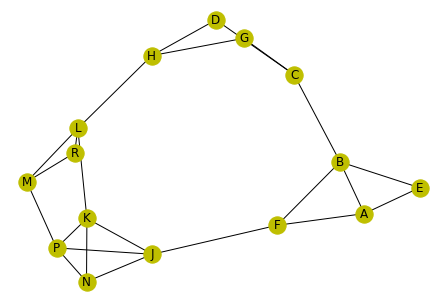

In [185]:
G = nx.from_numpy_matrix(adj_matrix)
labelmap = dict(zip(G.nodes(), labels))
nx.draw(G,labels=labelmap,node_color='y', with_labels=True)

# $ A^2 $

Expanding the matrix to get $A^2$, inflating by a factor of $1.2$ and normalizing the columns.

In [186]:
# MCL for n=2, r=1.2
pd.DataFrame(MCL(adj_matrix, 2, 1.2), index=labels, columns=labels).round(2)

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,0.23,0.20,0.08,0.02,0.24,0.18,0.02,0.00,0.03,0.01,0.00,0.00,0.01,0.01,0.00
B,0.26,0.24,0.14,0.08,0.26,0.19,0.08,0.03,0.03,0.01,0.00,0.00,0.01,0.01,0.00
C,0.07,0.09,0.20,0.19,0.07,0.05,0.19,0.13,0.01,0.00,0.02,0.00,0.00,0.00,0.01
D,0.01,0.03,0.13,0.19,0.01,0.01,0.17,0.13,0.00,0.00,0.04,0.01,0.00,0.00,0.01
E,0.16,0.15,0.06,0.02,0.18,0.12,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
F,0.18,0.16,0.07,0.02,0.17,0.17,0.02,0.01,0.06,0.03,0.01,0.01,0.04,0.04,0.00
G,0.01,0.03,0.13,0.17,0.01,0.01,0.19,0.13,0.00,0.00,0.04,0.01,0.00,0.00,0.01
H,0.00,0.02,0.13,0.19,0.01,0.00,0.19,0.20,0.01,0.02,0.09,0.05,0.01,0.01,0.07
J,0.05,0.04,0.01,0.00,0.03,0.09,0.00,0.01,0.19,0.17,0.06,0.08,0.20,0.18,0.04
K,0.01,0.01,0.01,0.01,0.00,0.05,0.01,0.05,0.18,0.19,0.11,0.13,0.20,0.19,0.10


#   $ A^4$

Expanding the matrix to get $A^4$, $A^8$,$A^{16}$,$A^{32}$ respectively, followed inflation (by a factor of $1.2$) and normalization of the columns.

In [187]:
# MCL for n=4, r=1.2
pd.DataFrame(MCL(adj_matrix,4,1.2), index=labels, columns=labels).round(2)

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,0.20,0.19,0.10,0.05,0.21,0.16,0.05,0.02,0.03,0.01,0.01,0.00,0.02,0.01,0.00
B,0.24,0.23,0.15,0.10,0.25,0.19,0.10,0.06,0.04,0.02,0.01,0.01,0.02,0.02,0.01
C,0.07,0.09,0.14,0.16,0.08,0.06,0.16,0.12,0.01,0.01,0.03,0.01,0.01,0.01,0.02
D,0.02,0.03,0.10,0.13,0.02,0.02,0.13,0.10,0.00,0.01,0.03,0.02,0.00,0.01,0.02
E,0.13,0.12,0.07,0.03,0.14,0.11,0.03,0.02,0.02,0.01,0.00,0.00,0.01,0.01,0.00
F,0.16,0.14,0.08,0.04,0.16,0.13,0.04,0.02,0.05,0.03,0.02,0.02,0.04,0.04,0.01
G,0.02,0.03,0.10,0.13,0.02,0.02,0.13,0.10,0.00,0.01,0.03,0.02,0.00,0.01,0.02
H,0.02,0.03,0.11,0.16,0.02,0.02,0.16,0.14,0.02,0.02,0.07,0.05,0.02,0.02,0.06
J,0.05,0.05,0.02,0.02,0.04,0.08,0.02,0.04,0.17,0.16,0.10,0.11,0.17,0.16,0.09
K,0.02,0.02,0.02,0.03,0.02,0.06,0.03,0.06,0.17,0.18,0.13,0.15,0.19,0.18,0.13


# $ A^8 $


In [188]:
# MCL for n=8, r=1.2
pd.DataFrame(MCL(adj_matrix,8,1.2), index=labels, columns=labels).round(2)

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,0.17,0.16,0.11,0.07,0.17,0.14,0.07,0.05,0.04,0.02,0.02,0.02,0.02,0.02,0.01
B,0.22,0.21,0.16,0.12,0.22,0.18,0.12,0.08,0.05,0.03,0.03,0.02,0.03,0.03,0.02
C,0.07,0.08,0.10,0.11,0.07,0.06,0.11,0.08,0.02,0.02,0.03,0.02,0.01,0.01,0.02
D,0.03,0.03,0.06,0.08,0.03,0.02,0.08,0.06,0.01,0.01,0.02,0.02,0.01,0.01,0.02
E,0.10,0.10,0.07,0.05,0.11,0.08,0.05,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01
F,0.13,0.12,0.09,0.06,0.13,0.11,0.06,0.04,0.05,0.04,0.03,0.03,0.04,0.04,0.03
G,0.03,0.03,0.06,0.08,0.03,0.02,0.08,0.06,0.01,0.01,0.02,0.02,0.01,0.01,0.02
H,0.03,0.04,0.08,0.10,0.03,0.03,0.10,0.09,0.03,0.03,0.05,0.04,0.03,0.03,0.05
J,0.06,0.06,0.05,0.05,0.06,0.08,0.05,0.07,0.15,0.15,0.12,0.13,0.15,0.15,0.12
K,0.04,0.04,0.05,0.06,0.04,0.07,0.06,0.09,0.16,0.17,0.15,0.16,0.17,0.17,0.16


# $ A^{16} $

In [189]:
# MCL for n=16, r=1.2
pd.DataFrame(MCL(adj_matrix, 16,1.2), index=labels, columns=labels).round(2) 

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,0.13,0.12,0.10,0.08,0.13,0.11,0.08,0.06,0.04,0.03,0.04,0.03,0.04,0.03,0.03
B,0.18,0.18,0.15,0.13,0.18,0.15,0.13,0.10,0.06,0.05,0.05,0.05,0.05,0.05,0.05
C,0.06,0.06,0.07,0.06,0.06,0.05,0.06,0.05,0.03,0.02,0.03,0.02,0.02,0.02,0.03
D,0.03,0.03,0.03,0.03,0.03,0.02,0.03,0.03,0.01,0.01,0.02,0.02,0.01,0.01,0.02
E,0.07,0.07,0.06,0.05,0.07,0.06,0.05,0.04,0.02,0.02,0.02,0.02,0.02,0.02,0.02
F,0.10,0.10,0.08,0.07,0.10,0.09,0.07,0.06,0.05,0.04,0.04,0.04,0.04,0.04,0.04
G,0.03,0.03,0.03,0.03,0.03,0.02,0.03,0.03,0.01,0.01,0.02,0.02,0.01,0.01,0.02
H,0.04,0.04,0.05,0.05,0.04,0.03,0.05,0.05,0.03,0.03,0.04,0.03,0.03,0.03,0.03
J,0.08,0.08,0.08,0.09,0.08,0.09,0.09,0.10,0.14,0.14,0.13,0.14,0.14,0.14,0.14
K,0.08,0.08,0.09,0.10,0.07,0.10,0.10,0.12,0.16,0.16,0.16,0.16,0.17,0.17,0.16


# $ A^{32}$


In [190]:
# MCL for n=32, r=1.2
pd.DataFrame(MCL(adj_matrix, 32,1.2), index=labels, columns=labels).round(2) 

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,0.09,0.09,0.08,0.07,0.09,0.08,0.07,0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.05
B,0.13,0.13,0.12,0.11,0.14,0.12,0.11,0.10,0.08,0.07,0.08,0.07,0.07,0.07,0.07
C,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
D,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01
E,0.04,0.04,0.04,0.03,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.02
F,0.07,0.07,0.07,0.06,0.07,0.07,0.06,0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.05
G,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01
H,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
J,0.11,0.11,0.11,0.12,0.11,0.12,0.12,0.13,0.14,0.14,0.14,0.14,0.14,0.14,0.14
K,0.12,0.12,0.13,0.14,0.12,0.13,0.14,0.15,0.16,0.16,0.16,0.16,0.16,0.16,0.16


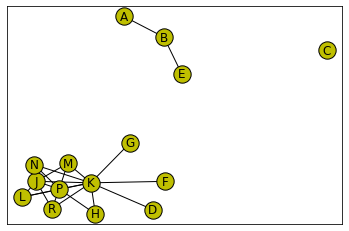

In [203]:
clustering = MCL(adj_matrix, 32, 1.2)
clustering[clustering<0.13]=0
G = nx.from_numpy_matrix(clustering)
labelmap = dict(zip(G.nodes(), labels))
pos = spring_layout(G)
nodes = nx.draw_networkx_nodes(G,pos, node_color='y')
draw_networkx_edges(G, pos)
draw_networkx_labels(G,pos, labels=labelmap)
nodes.set_edgecolor('k')
plt.show()


From the results of the MCL algorithm for the given graph and using parameters (Expansion=32 and Inflation=1.2), we can determine the following clusterings, though hit and trial(by tweaking the threshold value for clustering). In the following images, nodes that are connectd by an edge belong to a cluster.

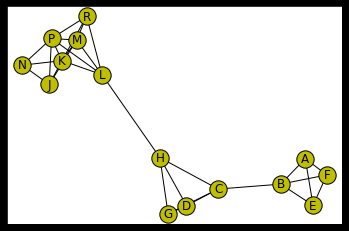
$$fig: Clustering 1 (e=32, r=1.2, threshold =0)$$

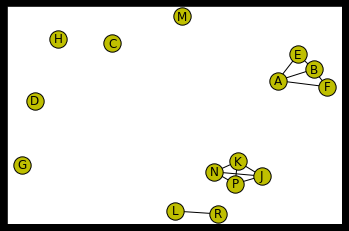
$$fig: Clustering 2 (e=8, r=1.2, threshold =0.2)$$

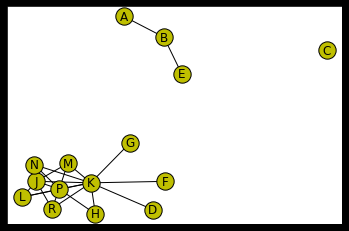
$$fig: Clustering 3 (e=32, r=1.2, threshold =0.1)$$

It is evident that clusters are not well defined by the results obtained.

 
In the final matrix i.e. $A^{32}$ (inflated and noramlized), we can see that there is not a clear distinction between the clusters. This can be understood by analyzing the graph structure.
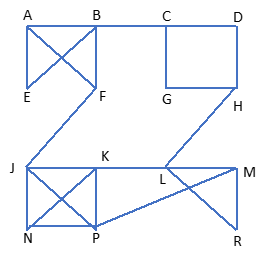

The clustering from visual inspection can be inferred as ABEF, CDGH, JKNP and LMR. However, it is worth noting that with some of the clusters, the inter cluster connections are as strong as intra-cluster connections, for eg. LMR has three inter-cluster connections. With inflation parameter set to $1.2$, the scaling of the transition probabilities is at a rate that is lower than the rate of expansion of the transition probabilities, this eventually leads to fairly even normalized values for the different edges, as the probabilites of inter cluster flow is significant at longer time periods (expansion cycles).

THe logical interpretation of the clustering would result in a lower number of clusters than actually exist. If we examine the results above, we can conclude that there is a **single** cluster comprising all the nodes in the graph.

The clusters obtained in the above clusterings (1, 2 & 3), we note that there is certainly some clusters that are identified sufficiently, for eg. in **clustering 2**(obtained from an early truncation of the MCL algorithm), clusters ABEF and NKPJ are identified well. This seems intuitive as these clusters have significant intra-cluster connectivity and are therefore easier to identify . For clusters CDGH and LMR, I was expecting them to be clustered with one of the above mentioned clusterings since they have strong inter cluster edges compared with intra cluster connections. 

The **clustering 3**, which is the result from 32 cycles of the MCL algoritm, we can notice that the gains in clustering almost vanish. There are two clusters ABE and , this makes sense intuitively because for low rates of inflation, the inter cluster transition probabilities over a large expansion period would rise to singificance. What is interesting to note however, is the fact that cluster 2 (JKNPLMRDGH) has absorbed nodes from the first cluster (ABE) as well.


#### Repeating the above steps for Inflation (r) = 1.5

In [107]:
# MCL for n=4, r=1.5
pd.DataFrame(MCL(adj_matrix,4,1.5), index=labels, columns=labels).round(2) 

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,0.27,0.26,0.08,0.02,0.27,0.24,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
B,0.37,0.37,0.17,0.07,0.38,0.33,0.07,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00
C,0.03,0.04,0.21,0.23,0.03,0.03,0.23,0.17,0.00,0.00,0.01,0.00,0.00,0.00,0.00
D,0.00,0.01,0.12,0.17,0.00,0.00,0.16,0.13,0.00,0.00,0.01,0.00,0.00,0.00,0.01
E,0.12,0.12,0.04,0.01,0.13,0.11,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
F,0.16,0.15,0.05,0.01,0.16,0.15,0.01,0.01,0.02,0.01,0.00,0.00,0.01,0.01,0.00
G,0.00,0.01,0.12,0.16,0.00,0.00,0.17,0.13,0.00,0.00,0.01,0.00,0.00,0.00,0.01
H,0.00,0.01,0.16,0.23,0.00,0.00,0.23,0.23,0.00,0.00,0.05,0.03,0.00,0.00,0.04
J,0.02,0.02,0.00,0.00,0.01,0.05,0.00,0.01,0.23,0.22,0.08,0.09,0.23,0.22,0.05
K,0.00,0.00,0.00,0.01,0.00,0.03,0.01,0.03,0.24,0.24,0.13,0.15,0.24,0.24,0.11


In [108]:
# MCL for n=8, r=1.5
pd.DataFrame(MCL(adj_matrix,8,1.5), index=labels, columns=labels).round(2) 

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,0.28,0.28,0.12,0.04,0.28,0.26,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
B,0.46,0.45,0.24,0.11,0.46,0.43,0.11,0.07,0.01,0.00,0.00,0.00,0.00,0.00,0.00
C,0.02,0.02,0.16,0.22,0.02,0.02,0.22,0.18,0.00,0.00,0.01,0.00,0.00,0.00,0.01
D,0.00,0.00,0.08,0.12,0.00,0.00,0.12,0.10,0.00,0.00,0.01,0.00,0.00,0.00,0.00
E,0.09,0.09,0.04,0.01,0.09,0.08,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
F,0.13,0.13,0.06,0.02,0.13,0.12,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
G,0.00,0.00,0.08,0.12,0.00,0.00,0.12,0.10,0.00,0.00,0.01,0.00,0.00,0.00,0.00
H,0.00,0.01,0.15,0.22,0.00,0.00,0.22,0.20,0.00,0.00,0.02,0.01,0.00,0.00,0.02
J,0.01,0.01,0.01,0.01,0.01,0.03,0.01,0.02,0.23,0.22,0.13,0.15,0.23,0.23,0.12
K,0.00,0.00,0.01,0.01,0.00,0.02,0.01,0.04,0.26,0.26,0.20,0.21,0.26,0.26,0.19


In [109]:
# MCL for n=16, r=1.5
pd.DataFrame(MCL(adj_matrix,16,1.5), index=labels, columns=labels).round(2) 

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,0.27,0.27,0.18,0.09,0.27,0.26,0.09,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00
B,0.57,0.57,0.42,0.25,0.57,0.56,0.25,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C,0.01,0.01,0.09,0.16,0.01,0.01,0.16,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00
D,0.00,0.00,0.03,0.06,0.00,0.00,0.06,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
E,0.05,0.05,0.03,0.02,0.05,0.05,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
F,0.09,0.09,0.06,0.03,0.09,0.08,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
G,0.00,0.00,0.03,0.06,0.00,0.00,0.06,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
H,0.00,0.00,0.08,0.16,0.00,0.00,0.16,0.14,0.00,0.00,0.01,0.00,0.00,0.00,0.01
J,0.00,0.00,0.01,0.02,0.00,0.01,0.02,0.05,0.23,0.23,0.20,0.21,0.23,0.23,0.20
K,0.00,0.00,0.01,0.03,0.00,0.01,0.03,0.08,0.29,0.29,0.28,0.28,0.29,0.29,0.28


In [110]:
# MCL for n=32, r=1.5
pd.DataFrame(MCL(adj_matrix,32,1.5), index=labels, columns=labels).round(2) 

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,0.23,0.23,0.21,0.16,0.23,0.23,0.16,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00
B,0.71,0.71,0.66,0.55,0.71,0.70,0.55,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C,0.00,0.00,0.01,0.04,0.00,0.00,0.04,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
D,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
E,0.02,0.02,0.02,0.01,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
F,0.04,0.04,0.04,0.03,0.04,0.04,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
G,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
H,0.00,0.00,0.01,0.03,0.00,0.00,0.03,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
J,0.00,0.00,0.01,0.03,0.00,0.00,0.03,0.08,0.23,0.23,0.23,0.23,0.23,0.23,0.23
K,0.00,0.00,0.01,0.05,0.00,0.00,0.05,0.13,0.33,0.33,0.33,0.33,0.33,0.33,0.33


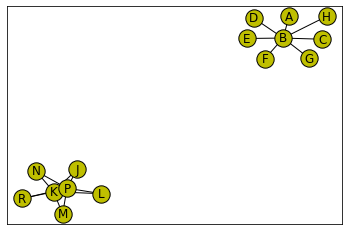

In [243]:
clustering = MCL(adj_matrix, 32, 1.5)
clustering[clustering<0.3]=0
G = nx.from_numpy_matrix(clustering)
labelmap = dict(zip(G.nodes(), labels))
pos = spring_layout(G)
nodes = nx.draw_networkx_nodes(G,pos, node_color='y')
draw_networkx_edges(G, pos)
draw_networkx_labels(G,pos, labels=labelmap)
nodes.set_edgecolor('k')
plt.show()

Using inflation rate at 1.5, we see an increased granularity in the clustering. The graph is divided into 2 clusters ABEFCGDH and JKLMRNP, this makes sense intuitively as for the expansion rate is higher than the inflation rate therefore some inter cluster connections gain significance


#### Repeating the steps for Inflation (r) = 2

<Interpretation>

In [111]:
# MCL for n=4, r=2
pd.DataFrame(MCL(adj_matrix,4,2), index=labels, columns=labels).round(2) 

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,0.28,0.28,0.02,0.00,0.28,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
B,0.59,0.59,0.09,0.01,0.59,0.57,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C,0.00,0.00,0.52,0.34,0.00,0.00,0.34,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00
D,0.00,0.00,0.09,0.16,0.00,0.00,0.13,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00
E,0.04,0.04,0.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
F,0.08,0.08,0.01,0.00,0.08,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
G,0.00,0.00,0.09,0.13,0.00,0.00,0.16,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00
H,0.00,0.00,0.19,0.35,0.00,0.00,0.35,0.54,0.00,0.00,0.01,0.00,0.00,0.00,0.00
J,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.27,0.01,0.02,0.27,0.27,0.00
K,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.28,0.03,0.04,0.28,0.28,0.02


In [112]:
# MCL for n=8, r=2
pd.DataFrame(MCL(adj_matrix,8,2), index=labels, columns=labels).round(2) 

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,0.18,0.18,0.01,0.00,0.18,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
B,0.80,0.80,0.06,0.01,0.80,0.80,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C,0.00,0.00,0.57,0.44,0.00,0.00,0.44,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00
D,0.00,0.00,0.03,0.04,0.00,0.00,0.04,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
E,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
F,0.02,0.02,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
G,0.00,0.00,0.03,0.04,0.00,0.00,0.04,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
H,0.00,0.00,0.30,0.47,0.00,0.00,0.47,0.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00
J,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.29,0.00,0.00,0.29,0.29,0.00
K,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.31,0.01,0.01,0.31,0.31,0.00


In [113]:
# MCL for n=16, r=2
pd.DataFrame(MCL(adj_matrix,16,2), index=labels, columns=labels).round(2) 

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,0.05,0.05,0.00,0.00,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
B,0.95,0.95,0.02,0.00,0.95,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C,0.00,0.00,0.55,0.45,0.00,0.00,0.45,0.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00
D,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
E,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
F,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
G,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
H,0.00,0.00,0.42,0.54,0.00,0.00,0.54,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00
J,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.29,0.00,0.00,0.29,0.29,0.00
K,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.34,0.34,0.00,0.00,0.34,0.34,0.00


In [114]:
# MCL for n=32, r=2
pd.DataFrame(MCL(adj_matrix,32,2), index=labels, columns=labels).round(2) 

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,R
A,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
B,1.0,1.0,0.00,0.00,1.0,1.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
C,0.0,0.0,0.44,0.39,0.0,0.0,0.39,0.35,0.00,0.00,0.0,0.0,0.00,0.00,0.0
D,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
E,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
F,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
G,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
H,0.0,0.0,0.56,0.61,0.0,0.0,0.61,0.65,0.00,0.00,0.0,0.0,0.00,0.00,0.0
J,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.26,0.26,0.0,0.0,0.26,0.26,0.0
K,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.36,0.36,0.0,0.0,0.36,0.36,0.0


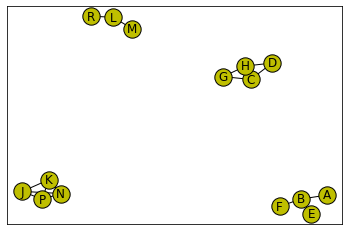

In [240]:
clustering = MCL(adj_matrix, 32, 2)
clustering[clustering<0.01]=0
G = nx.from_numpy_matrix(clustering)
labelmap = dict(zip(G.nodes(), labels))
pos = spring_layout(G)
nodes = nx.draw_networkx_nodes(G,pos, node_color='y')
draw_networkx_edges(G, pos)
draw_networkx_labels(G,pos, labels=labelmap)
nodes.set_edgecolor('k')
plt.show()

THe above clustering perfectly captures the clusters in the graph. This is an improvement over both the MCL implementations previously. This underscores the importance of the inflation parameter in the MCL algorithm. We notice that there is an increase in the granuality of the clustering, with the algorithm able to determine finer and more precise cliustering in the graph as the inflation parameter increases from 1.2 to 2. 

To understand why this happen, we can look at the basic steps in the algorithm.
1. Expand: The algorithm expands the transition matrix to calculate the transition probabilities in subsequent time periods
2. Inflate: The expanded probabilities are then inflated by a factor
3. Normalize: The column of the transition matrix are normalized to add up to 1.

The effect of these three steps is basically to inflate (increase) the stronger connections (intra-cluster) and deflate the weaker connections (inter-cluster). An important thing to note is that the expansion step and the inflation followed by normalization step are essentially at odds with each other, expansion tries to regularize the difference in the probabilities while inflation tries to exacerbate the difference between the probabilities. This is evident in the first two implementations where the inflation parameter is not able to keep up with the expansion and we end up losing the clustering granularity. However, in the third inflation (r=2) we can not only identify the granular clusters but also converge efficiently without needing to set a threshold to detetrmine the clusters.